# **WORK HAPPINESS REPORT DATASET EXPLORATION**
*I started to learn Pandas in March and then got my hands on Matplotlib around April. I want to improve my skills more, so please feel free to give feedback down below if you have the time, any welcomed. Hope you enjoy this visualization!*

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as ss
from matplotlib.gridspec import GridSpec

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/world-happiness/2017.csv
/kaggle/input/world-happiness/2019.csv
/kaggle/input/world-happiness/2015.csv
/kaggle/input/world-happiness/2016.csv
/kaggle/input/world-happiness/2018.csv


In [2]:
df2015=pd.read_csv("/kaggle/input/world-happiness/2015.csv").rename(columns={'Happiness Rank': 'Happiness Rank 2015','Happiness Score': 'Happiness Score 2015'})
df2016=pd.read_csv("/kaggle/input/world-happiness/2016.csv").rename(columns={'Happiness Rank': 'Happiness Rank 2016','Happiness Score': 'Happiness Score 2016'})
df2017=pd.read_csv("/kaggle/input/world-happiness/2017.csv").rename(columns={'Whisker.high':'Upper Confidence Interval','Whisker.low':'Lower Confidence Interval', 'Happiness.Rank': 'Happiness Rank 2017','Happiness.Score': 'Happiness Score 2017'})
df2018=pd.read_csv("/kaggle/input/world-happiness/2018.csv").rename(columns={'Country or region':'Country','Overall rank': 'Happiness Rank 2018','Score': 'Happiness Score 2018'})
df2019=pd.read_csv("/kaggle/input/world-happiness/2019.csv").rename(columns={'Country or region':'Country','Overall rank': 'Happiness Rank 2019','Score': 'Happiness Score 2019'})
df2017.head()

,Country,Happiness Rank 2017,Happiness Score 2017,Upper Confidence Interval,Lower Confidence Interval,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [3]:
df2015.groupby('Region').size()

Region
Australia and New Zealand           2
Central and Eastern Europe         29
Eastern Asia                        6
Latin America and Caribbean        22
Middle East and Northern Africa    20
North America                       2
Southeastern Asia                   9
Southern Asia                       7
Sub-Saharan Africa                 40
Western Europe                     21
dtype: int64

In [4]:
df2015.Country=df2015.Country.replace({'Somaliland region': 'Somaliland Region'})

df2017.Country=df2017.Country.replace({'Hong Kong S.A.R., China': 'Hong Kong', 'Taiwan Province of China': 'Taiwan'})
df2017=pd.merge(df2017, df2016[['Country', 'Region']], how='left', on='Country')
df2017.loc[[112, 138, 154], 'Region']='Sub-Saharan Africa'

df2018.Country=df2018.Country.replace({'Hong Kong S.A.R., China': 'Hong Kong', 'Taiwan Province of China': 'Taiwan', 'Trinidad & Tobago': 'Trinidad and Tobago'})
df2018=pd.merge(df2018, df2016[['Country', 'Region']], how='left', on='Country')
df2018.loc[[122, 140, 154], 'Region']='Sub-Saharan Africa'
df2018.loc[37, 'Region']='Latin America and Caribbean'
df2018.loc[57, 'Region']='Western Europe'

df2019.Country=df2019.Country.replace({'Hong Kong S.A.R., China': 'Hong Kong', 'Taiwan Province of China': 'Taiwan', 'Trinidad & Tobago': 'Trinidad and Tobago'})
df2019=pd.merge(df2019, df2016[['Country', 'Region']], how='left', on='Country')
df2019.loc[[119, 122, 134, 143, 154], 'Region']='Sub-Saharan Africa'
df2019.loc[38, 'Region']='Latin America and Caribbean'
df2019.loc[63, 'Region']='Western Europe'
df2019.loc[83, 'Region']='Central and Eastern Europe'

In [5]:
byregion_2015=df2015.groupby('Region').mean()['Happiness Score 2015'].reset_index().sort_values(by='Region', ascending=True)
byregion_2016=df2016.groupby('Region').mean()['Happiness Score 2016'].reset_index().sort_values(by='Region', ascending=True)
byregion_2017=df2017.groupby('Region').mean()['Happiness Score 2017'].reset_index().sort_values(by='Region', ascending=True)
byregion_2018=df2018.groupby('Region').mean()['Happiness Score 2018'].reset_index().sort_values(by='Region', ascending=True)
byregion_2019=df2019.groupby('Region').mean()['Happiness Score 2019'].reset_index().sort_values(by='Region', ascending=True)

byregion_overall=pd.concat([byregion_2015, byregion_2016['Happiness Score 2016'], byregion_2017['Happiness Score 2017'], byregion_2018['Happiness Score 2018'], byregion_2019['Happiness Score 2019']], axis=1)
byregion_overall.head()

,Region,Happiness Score 2015,Happiness Score 2016,Happiness Score 2017,Happiness Score 2018,Happiness Score 2019
0,Australia and New Zealand,7.285000,7.323500,7.299000,7.298000,7.267500
1,Central and Eastern Europe,5.332931,5.370690,5.409931,5.463966,5.561517
2,Eastern Asia,5.626167,5.624167,5.646667,5.672000,5.688833
3,Latin America and Caribbean,6.144682,6.101750,5.957818,5.950136,5.954429
4,Middle East and Northern Africa,5.406900,5.386053,5.369684,5.282737,5.237000


In [6]:
byregion_overall=byregion_overall.T
byregion_overall.columns=byregion_overall.iloc[0]
byregion_overall=byregion_overall.reset_index()
byregion_overall.drop(0, inplace=True)

byregion_overall['index']=[2015,2016,2017,2018,2019]
byregion_overall['index']=pd.to_datetime(byregion_overall['index'], format='%Y')
byregion_overall

Region,index,Australia and New Zealand,Central and Eastern Europe,Eastern Asia,Latin America and Caribbean,Middle East and Northern Africa,North America,Southeastern Asia,Southern Asia,Sub-Saharan Africa,Western Europe
1,2015-01-01,7.285,5.33293,5.62617,6.14468,5.4069,7.273,5.31744,4.58086,4.2028,6.68962
2,2016-01-01,7.3235,5.37069,5.62417,6.10175,5.38605,7.254,5.33889,4.56329,4.13642,6.68567
3,2017-01-01,7.299,5.40993,5.64667,5.95782,5.36968,7.1545,5.44488,4.62843,4.11195,6.70371
4,2018-01-01,7.298,5.46397,5.672,5.95014,5.28274,7.107,5.31344,4.60386,4.19503,6.78176
5,2019-01-01,7.2675,5.56152,5.68883,5.95443,5.237,7.085,5.27367,4.52686,4.30005,6.84219


In [7]:
bycountry_2015=df2015[['Country', 'Region', 'Happiness Score 2015', 'Standard Error']].sort_values(by=['Region', 'Country'], ascending=True)
bycountry_2016=df2016[['Country', 'Region', 'Happiness Score 2016', 'Lower Confidence Interval', 'Upper Confidence Interval']].sort_values(by=['Region', 'Country'], ascending=True)
bycountry_2017=df2017[['Country', 'Region', 'Happiness Score 2017', 'Lower Confidence Interval', 'Upper Confidence Interval']].sort_values(by=['Region', 'Country'], ascending=True)
bycountry_2018=df2018[['Country', 'Region', 'Happiness Score 2018']].sort_values(by=['Region', 'Country'], ascending=True)
bycountry_2019=df2019[['Country', 'Region', 'Happiness Score 2019']].sort_values(by=['Region', 'Country'], ascending=True)

In [8]:
bycountry_2017.head()

,Country,Region,Happiness Score 2017,Lower Confidence Interval,Upper Confidence Interval
9,Australia,Australia and New Zealand,7.284,7.211349,7.356651
7,New Zealand,Australia and New Zealand,7.314,7.248490,7.379510
108,Albania,Central and Eastern Europe,4.644,4.535536,4.752464
120,Armenia,Central and Eastern Europe,4.376,4.285265,4.466735
84,Azerbaijan,Central and Eastern Europe,5.234,5.168714,5.299287


In [9]:
from functools import reduce
dfs=[bycountry_2015, bycountry_2016, bycountry_2017, bycountry_2018, bycountry_2019]
bycountry_overall=reduce( lambda left, right: pd.merge(left, right, how='outer', on=['Country', 'Region']), dfs )

happcol=['Happiness Score 2015', 'Happiness Score 2016','Happiness Score 2017']
bycountry_overall['Overall Mean Score']=bycountry_overall[happcol].mean(axis=1)
bycountry_overall=bycountry_overall.rename(columns={'Standard Error':'Standard_Error2015', 'Lower Confidence Interval_x': 'LCI2016','Upper Confidence Interval_x': 'UCI2016','Lower Confidence Interval_y': 'LCI2017','Upper Confidence Interval_y': 'UCI2017'})
bycountry_overall.head()

,Country,Region,Happiness Score 2015,Standard_Error2015,Happiness Score 2016,LCI2016,UCI2016,Happiness Score 2017,LCI2017,UCI2017,Happiness Score 2018,Happiness Score 2019,Overall Mean Score
0,Australia,Australia and New Zealand,7.284,0.04083,7.313,7.241,7.385,7.284,7.211349,7.356651,7.272,7.228,7.293667
1,New Zealand,Australia and New Zealand,7.286,0.03371,7.334,7.264,7.404,7.314,7.248490,7.379510,7.324,7.307,7.311333
2,Albania,Central and Eastern Europe,4.959,0.05013,4.655,4.546,4.764,4.644,4.535536,4.752464,4.586,4.719,4.752667
3,Armenia,Central and Eastern Europe,4.350,0.04763,4.360,4.266,4.454,4.376,4.285265,4.466735,4.321,4.559,4.362000
4,Azerbaijan,Central and Eastern Europe,5.212,0.03363,5.291,5.226,5.356,5.234,5.168714,5.299287,5.201,5.208,5.245667


In [10]:
bycountry_middleeast=bycountry_overall.query(' Region=="Middle East and Northern Africa" ').T
bycountry_middleeast.columns=bycountry_middleeast.loc['Country']
bycountry_middleeast.drop(['Country', 'Region'], inplace=True)
bycountry_middleeast=bycountry_middleeast.reset_index()
bycountry_middleeast

Country,index,Algeria,Bahrain,Egypt,Iran,Iraq,Israel,Jordan,Kuwait,Lebanon,...,Morocco,Oman,Palestinian Territories,Qatar,Saudi Arabia,Syria,Tunisia,Turkey,United Arab Emirates,Yemen
0,Happiness Score 2015,5.605,5.96,4.194,4.686,4.677,7.278,5.192,6.295,4.839,...,5.013,6.853,4.715,6.611,6.411,3.006,4.739,5.332,6.901,4.077
1,Standard_Error2015,0.05099,0.05412,0.0326,0.04449,0.05232,0.0347,0.04524,0.04456,0.04337,...,0.0342,0.05335,0.04394,0.06257,0.04633,0.05015,0.03589,0.03864,0.03729,0.04367
2,Happiness Score 2016,6.355,6.218,4.362,4.813,4.575,7.267,5.303,6.239,5.129,...,5.151,NaN,4.754,6.375,6.379,3.069,5.045,5.389,6.573,3.724
3,LCI2016,6.227,6.128,4.259,4.703,4.446,7.199,5.187,6.154,5.031,...,5.058,NaN,4.649,6.178,6.287,2.936,4.965,5.295,6.494,3.621
4,UCI2016,6.483,6.308,4.465,4.923,4.704,7.335,5.419,6.324,5.227,...,5.244,NaN,4.859,6.572,6.471,3.202,5.125,5.483,6.652,3.827
5,Happiness Score 2017,5.872,6.087,4.735,4.692,4.497,7.213,5.336,6.105,5.225,...,5.235,NaN,4.775,6.375,6.344,3.462,4.805,5.5,6.648,3.593
6,LCI2017,5.76571,5.99501,4.64487,4.58578,4.37141,7.14615,5.22359,6.01804,5.13112,...,5.15166,NaN,4.66815,6.18152,6.24383,3.26033,4.72563,5.40514,6.57395,3.49325
7,UCI2017,5.97829,6.17899,4.82513,4.79822,4.62259,7.27985,5.44841,6.19196,5.31888,...,5.31834,NaN,4.88185,6.56848,6.44417,3.66367,4.88437,5.59486,6.72205,3.69275
8,Happiness Score 2018,5.295,6.105,4.419,4.707,4.456,6.814,5.161,6.083,5.358,...,5.254,NaN,4.743,6.374,6.371,3.462,4.592,5.483,6.774,3.355
9,Happiness Score 2019,5.211,6.199,4.166,4.548,4.437,7.139,4.906,6.021,5.197,...,5.208,NaN,4.696,6.374,6.375,3.462,4.461,5.373,6.825,3.38


In [11]:
bycountry_middleeast.drop('Oman', axis=1, inplace=True)

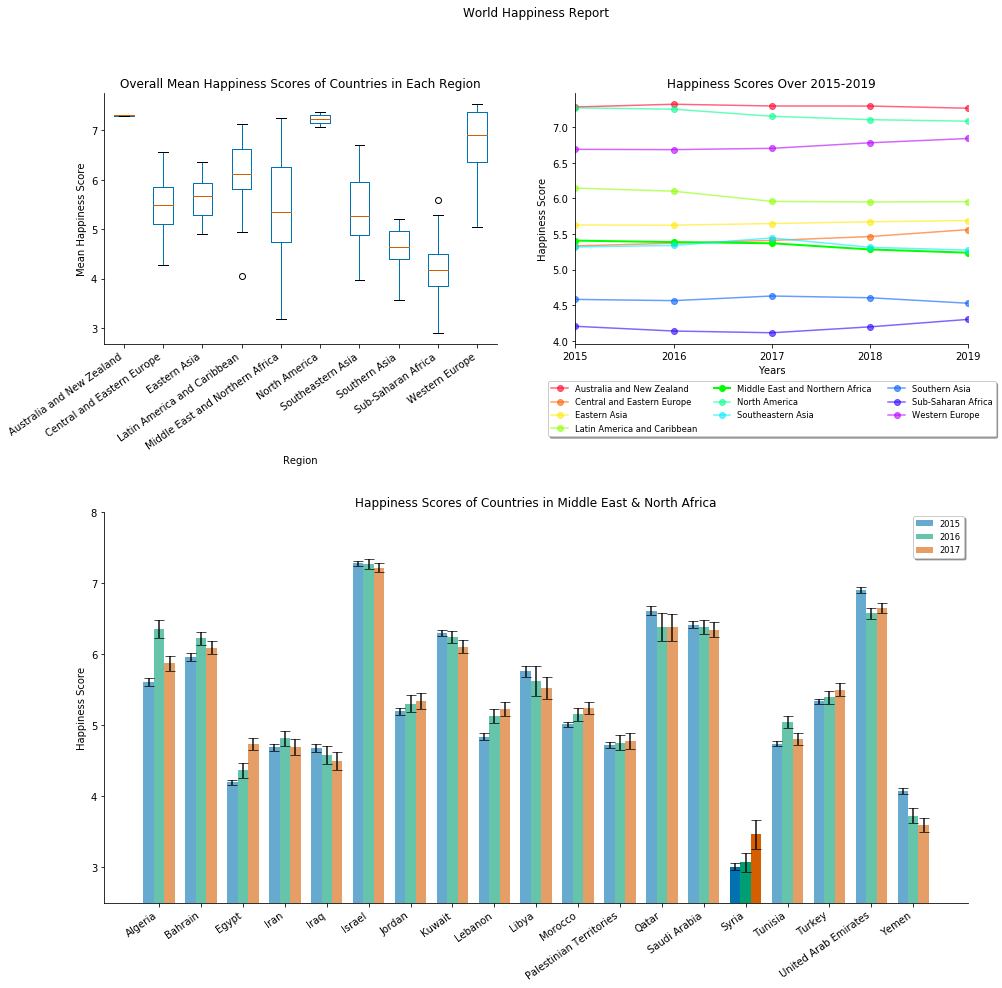

In [12]:
#PLOTTING

plt.style.use('seaborn-colorblind')
fig=plt.figure(figsize=[15,15])

gs = GridSpec(6,2, figure=fig, hspace=0.25, wspace=0.2)

ax1 = fig.add_subplot(gs[0:2,0])
bycountry_overall.boxplot(column='Overall Mean Score', by='Region', ax=ax1)

labels=ax1.get_xticklabels()
ax1.set_xticklabels(labels, rotation=35, ha='right')

ax1.set_title('Overall Mean Happiness Scores of Countries in Each Region')
ax1.set_ylabel('Mean Happiness Score')
plt.suptitle("World Happiness Report")
ax1.xaxis.grid(False)
ax1.yaxis.grid(False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

#2nd plot

columns=byregion_overall.columns[1:].to_list()
cm = plt.get_cmap('gist_rainbow')
NUM_COLORS=10
ax2 = fig.add_subplot(gs[0:2,1])
ax2.set_prop_cycle('color', [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
line=byregion_overall.plot('index',columns, marker='o', alpha=0.6, ax=ax2)

ax2.set_title('Happiness Scores Over 2015-2019')
ax2.set_ylabel('Happiness Score')
ax2.set_xlabel('Years')

#highlight Middle East and Northern Africa
position=byregion_overall.columns.get_loc('Middle East and Northern Africa')-1 #minus one because first col is index which we dont use
line.lines[position].set_alpha(1)
line.lines[position].set_linewidth(2)

# Put a legend below current axis
ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.13),
          fancybox=True, shadow=True, ncol=3, fontsize='small')

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

#3rd plot: Countries in middle east
N=19
width = 0.25       # the width of the bars
countries=bycountry_middleeast.columns.to_list()[1:]
ax3 = fig.add_subplot(gs[3:,:])
bars1=ax3.bar(np.arange(N), bycountry_middleeast.iloc[0, 1:], label='2015', width=width,
        yerr=bycountry_middleeast.iloc[1,1:],capsize=7,alpha=0.6,
        error_kw={'capsize': 5, 'elinewidth': 2, 'alpha':0.7}) 

bars2=ax3.bar(np.arange(N)+width,bycountry_middleeast.iloc[2, 1:], label='2016',width=width,
       yerr=np.c_[bycountry_middleeast.iloc[2, 1:]-bycountry_middleeast.iloc[3,1:],bycountry_middleeast.iloc[4, 1:]-bycountry_middleeast.iloc[2,1:] ].T,
        alpha=0.6,error_kw={'capsize': 5, 'elinewidth': 2, 'alpha':0.7})

bars3=ax3.bar(np.arange(N)+width*2, bycountry_middleeast.iloc[5, 1:], label='2017',width=width,
       yerr=np.c_[bycountry_middleeast.iloc[5, 1:]-bycountry_middleeast.iloc[6,1:],bycountry_middleeast.iloc[7, 1:]-bycountry_middleeast.iloc[5,1:] ].T,
        alpha=0.6,error_kw={'capsize': 5, 'elinewidth': 2, 'alpha':0.7})
ax3.legend(fancybox=True, shadow=True,fontsize='small')

ax3.set_title('Happiness Scores of Countries in Middle East & North Africa')

ax3.set_xticks(np.arange(N) + width)
ax3.set_xticklabels(countries, rotation=35, ha='right')

ax3.set_ylim([2.5,8])

ax3.set_ylabel('Happiness Score')

[ax3.spines[loc].set_visible(False) for loc in ['top', 'right']] 

#highlight Syria
pos=bycountry_middleeast.columns.get_loc('Syria')-1
bars1[pos].set_alpha(1)
bars2[pos].set_alpha(1)
bars3[pos].set_alpha(1)

In [13]:
#fig.savefig('assignment4.png', dpi=fig.dpi)